# *This is the final assignment of the IBM Data Science Professional Certificate*

# **Brooklyn restaurant guide**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


**Let's import the New York data:**

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
NY_neighborhoods= newyork_data['features']

**Tranform the data into a _pandas_ dataframe**


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [6]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one column at a time.


In [7]:
for data in NY_neighborhoods:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]    ))

The dataframe has 5 boroughs and 306 neighborhoods.


Then we segment and cluster only the neigborhoods in Brooklyn:

In [10]:
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Brooklyn_data['Borough'].unique()), Brooklyn_data.shape[0]))

The dataframe has 1 boroughs and 70 neighborhoods.


A: Geographical coordinates of Brooklyn

In [12]:
address = 'Brooklyn'

geolocator = Nominatim(user_agent="brooklyn_restaurants")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


B: Visualization of Brooklyn's neighborhoods





In [13]:
# create map of Brooklyn using latitude and longitude 
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to the map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='slateblue',
        fill=True,
        fill_color='#steelblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn) 
    
map_brooklyn

In [14]:
CLIENT_ID = '2REMVXIVS00JPMPAWFDVNJ55W1CCBQ3HRUU1RYZPXPL22INL' # your Foursquare ID
CLIENT_SECRET = 'U3XH5EQQCQP2TZCQHY40RFDPIUEAD2EUW1SGFWUVDRSTFNRR' # your Foursquare Secret
ACCESS_TOKEN = 'M4SGO0SCL5LQ3DQ1BIRXE2ULMNITG5DSXI5XLT5AJNIO3HUU'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500

In [15]:
Brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

**D**: Show the top 50 venues in Bay Ridge within a radius of 500 meters.

In [16]:
neighborhood_latitude = Brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [17]:
LIMIT = 50

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2REMVXIVS00JPMPAWFDVNJ55W1CCBQ3HRUU1RYZPXPL22INL&client_secret=U3XH5EQQCQP2TZCQHY40RFDPIUEAD2EUW1SGFWUVDRSTFNRR&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=50'

In [18]:
results = requests.get(url).json()

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Leo's Casa Calamari,Pizza Place,40.624200,-74.030931
3,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Georgian Dream Cafe and Bakery,Caucasian Restaurant,40.625586,-74.030196


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [22]:
print ('{} unique categories in Bay Ridge.'.format(nearby_venues['categories'].value_counts().shape[0]))

35 unique categories in Bay Ridge.


In [23]:
print (nearby_venues['categories'].value_counts()[0:4])

Spa                   5
Pizza Place           3
Italian Restaurant    3
Greek Restaurant      3
Name: categories, dtype: int64


E: Exploration of the neighbourhoods in Brooklyn

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [25]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [26]:
Brooklyn_venues.shape

(6994, 7)

In [27]:
Brooklyn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
1,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
2,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Mimi Nails,40.622571,-74.031477,Spa


In [28]:
# Drop rows where Venue Category has just the name 'Restaurant'
Brooklyn_venues.drop(Brooklyn_venues.loc[Brooklyn_venues['Venue Category']=='Restaurant'].index, inplace=True)

In [29]:
Brooklyn_venues.shape

(6936, 7)

In [30]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Brooklyn_venues_restaurant = Brooklyn_venues[Brooklyn_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Brooklyn_venues_restaurant.index = np.arange(1, len(Brooklyn_venues_restaurant )+1)

In [31]:
print (Brooklyn_venues_restaurant['Venue Category'].value_counts())

Italian Restaurant                 231
Caribbean Restaurant               216
American Restaurant                103
Mexican Restaurant                  95
Sushi Restaurant                    87
Japanese Restaurant                 75
Chinese Restaurant                  72
Thai Restaurant                     49
Seafood Restaurant                  44
Latin American Restaurant           41
Indian Restaurant                   36
New American Restaurant             34
Vietnamese Restaurant               33
French Restaurant                   32
Turkish Restaurant                  31
Russian Restaurant                  31
Tapas Restaurant                    30
Middle Eastern Restaurant           30
Mediterranean Restaurant            28
Fast Food Restaurant                26
Greek Restaurant                    26
Eastern European Restaurant         25
Southern / Soul Food Restaurant     22
Asian Restaurant                    20
Peruvian Restaurant                 15
Vegetarian / Vegan Restau

In [32]:
Brooklyn_venues_restaurant.shape

(1653, 7)

In [33]:
Brooklyn_venues_restaurant.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Bay Ridge,40.625801,-74.030621,Karam,40.622931,-74.028316,Middle Eastern Restaurant
2,Bay Ridge,40.625801,-74.030621,Tanoreen,40.630726,-74.027954,Middle Eastern Restaurant
3,Bay Ridge,40.625801,-74.030621,Tuscany Grill,40.622913,-74.031387,Italian Restaurant


In [34]:
# create a dataframe of top 10 categories
Brooklyn_venues_restaurant_Top10 = Brooklyn_venues_restaurant['Venue Category'].value_counts()[0:10
                                                                                               ].to_frame(name='frequency')
Brooklyn_venues_restaurant_Top10=Brooklyn_venues_restaurant_Top10.reset_index()
Brooklyn_venues_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Brooklyn_venues_restaurant_Top10

,Venue_Category,Frequency
0,Italian Restaurant,231
1,Caribbean Restaurant,216
2,American Restaurant,103
3,Mexican Restaurant,95
4,Sushi Restaurant,87
5,Japanese Restaurant,75
6,Chinese Restaurant,72
7,Thai Restaurant,49
8,Seafood Restaurant,44
9,Latin American Restaurant,41


Set Venue_Category as Index

Let's visualize in a bar chart

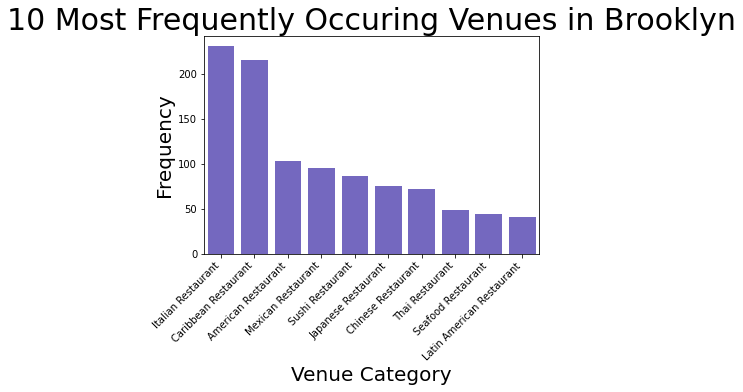

<Figure size 1800x576 with 0 Axes>

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Brooklyn_venues_restaurant_Top10, color='slateblue')
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Brooklyn', fontsize=30)
plt.xlabel("Venue Category", fontsize=20)
plt.ylabel ("Frequency", fontsize=20)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,8))
plt.show() 

In [36]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Brooklyn_venues_restaurant.shape)

Shape of the Data-Frame with Venue Category only Restaurant:  (1653, 7)


In [37]:
print('There are {} unique categories.'.format(len(Brooklyn_venues_restaurant['Venue Category'].unique())))

There are 61 unique categories.



G: Analysis of the neighbourhoods.

In [38]:
Brooklyn_restaurant = Brooklyn_venues_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Brooklyn_restaurant

Neighborhood
Bath Beach                   21
Bay Ridge                    23
Bedford Stuyvesant           29
Bensonhurst                  26
Bergen Beach                 19
Boerum Hill                  25
Borough Park                 30
Brighton Beach               22
Broadway Junction            27
Brooklyn Heights             18
Brownsville                  25
Bushwick                     20
Canarsie                     23
Carroll Gardens              22
City Line                    12
Clinton Hill                 26
Cobble Hill                  18
Coney Island                  8
Crown Heights                30
Cypress Hills                14
Ditmas Park                  26
Downtown                     23
Dumbo                        18
Dyker Heights                24
East Flatbush                33
East New York                11
East Williamsburg            23
Erasmus                      29
Flatbush                     26
Flatlands                    28
Fort Greene                

In [39]:
Brooklyn_restaurant_df  = Brooklyn_restaurant.to_frame().reset_index()
Brooklyn_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Brooklyn_restaurant_df.index = np.arange(1, len(Brooklyn_restaurant_df)+1)
list_rest_no =Brooklyn_restaurant_df['Number of Restaurant'].to_list()
list_dist =Brooklyn_restaurant_df['Neighborhood'].to_list()

In [40]:
# one hot encoding
Brooklyn_onehot = pd.get_dummies(Brooklyn_venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brooklyn_onehot['Neighborhood'] = Brooklyn_venues_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Brooklyn_onehot.columns[-1]] + list(Brooklyn_onehot.columns[:-1])
Brooklyn_onehot = Brooklyn_onehot[fixed_columns]


Brooklyn_onehot.head(10)


,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
1,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bay Ridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bay Ridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Bay Ridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
Brooklyn_onehot.shape

(1653, 62)

H: Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.

In [42]:
Brooklyn_restaurant_grouped = Brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
Brooklyn_restaurant_grouped.head(10)
                                

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Bath Beach,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.047619,0.0,0.095238,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.0,0.000000,0.000000,0.000000,0.000000,0.380952,0.000000,0.0,0.00,0.000000,0.000000,0.095238,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.0,0.000000,0.047619,0.000000
1,Bay Ridge,0.000000,0.173913,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.086957,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.130435,0.0,0.000000,0.000000,0.043478,0.000000,0.173913,0.043478,0.0,0.00,0.000000,0.000000,0.086957,0.086957,0.0,0.0,0.043478,0.00,0.000000,0.0,0.00,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.0,0.000000,0.000000,0.043478
2,Bedford Stuyvesant,0.034483,0.068966,0.0,0.0,0.034483,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.068966,0.0,0.000000,0.034483,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.172414,0.068966,0.0,0.00,0.034483,0.000000,0.103448,0.000000,0.0,0.0,0.103448,0.00,0.000000,0.0,0.00,0.000000,0.034483,0.0,0.068966,0.000000,0.068966,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Bensonhurst,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.038462,0.0,0.115385,0.000000,0.0,0.076923,0.000000,0.000000,0.000000,0.0,0.00,0.038462,0.000000,0.000000,0.000000,0.038462,0.038462,0.0,0.000000,0.000000,0.000000,0.000000,0.269231,0.000000,0.0,0.00,0.000000,0.000000,0.038462,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.038462,0.038462,0.0,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.076923,0.000000
4,Bergen Beach,0.000000,0.105263,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.315789,0.0,0.105263,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.105263,0.052632,0.0,0.00,0.000000,0.000000,0.052632,0.000000,0.0,0.0,0.000000,0.00,0.052632,0.0,0.00,0.000000,0.105263,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Boerum Hill,0.000000,0.080000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.040000,0.000000,0.040000,0.0,0.04,0.000000,0.000000,0.000000,0.040000,0.000000,0.040000,0.0,0.000000,0.000000,0.000000,0.040000,0.240000,0.040000,0.0,0.04,0.040000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.04,0.000000,0.0,0.04,0.000

In [43]:
Brooklyn_restaurant_grouped.shape

(70, 62)

In [44]:
num_top_venues = 10

for hood in Brooklyn_restaurant_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Brooklyn_restaurant_grouped[Brooklyn_restaurant_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                   venue  freq
0     Italian Restaurant  0.38
1       Sushi Restaurant  0.14
2     Mexican Restaurant  0.10
3   Cantonese Restaurant  0.10
4  Vietnamese Restaurant  0.05
5     Turkish Restaurant  0.05
6      German Restaurant  0.05
7     Burmese Restaurant  0.05
8     Falafel Restaurant  0.05
9       Greek Restaurant  0.05


----Bay Ridge----
                       venue  freq
0         Italian Restaurant  0.17
1        American Restaurant  0.17
2           Greek Restaurant  0.13
3         Chinese Restaurant  0.09
4  Middle Eastern Restaurant  0.09
5         Mexican Restaurant  0.09
6         Turkish Restaurant  0.04
7         Seafood Restaurant  0.04
8    New American Restaurant  0.04
9        Japanese Restaurant  0.04


----Bedford Stuyvesant----
                             venue  freq
0               Italian Restaurant  0.17
1          New American Restaurant  0.10
2               Mexican Restaurant  0.10
3                  Thai Restaurant  0.07
4

J: Creating a pandas dataframe.

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Brooklyn_restaurant_grouped['Neighborhood']

for ind in np.arange(Brooklyn_restaurant_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brooklyn_restaurant_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Italian Restaurant,Sushi Restaurant,Cantonese Restaurant,Mexican Restaurant,Turkish Restaurant,Greek Restaurant,German Restaurant,Burmese Restaurant,Vietnamese Restaurant,Falafel Restaurant
1,Bay Ridge,Italian Restaurant,American Restaurant,Greek Restaurant,Chinese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Japanese Restaurant,New American Restaurant
2,Bedford Stuyvesant,Italian Restaurant,Mexican Restaurant,New American Restaurant,American Restaurant,Caribbean Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Southern / Soul Food Restaurant,Seafood Restaurant
3,Bensonhurst,Italian Restaurant,Cantonese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Turkish Restaurant,Chinese Restaurant,Russian Restaurant,Seafood Restaurant,Greek Restaurant,Mexican Restaurant
4,Bergen Beach,Caribbean Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Fast Food Restaurant,Peruvian Restaurant,Mexican Restaurant,Japanese Restaurant,Filipino Restaurant
5,Boerum Hill,Italian Restaurant,American Restaurant,Thai Restaurant,Eastern European Restaurant,Persian Restaurant,Greek Restaurant,Ethiopian Restaurant,Ramen Restaurant,Latin American Restaurant,Seafood Restaurant
6,Borough Park,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Vietnamese Restaurant,Thai Restaurant,Middle Eastern Restaurant,Hotpot Restaurant,Japanese Restaurant,Dumpling Restaurant,Mediterranean Restaurant
7,Brighton Beach,Italian Restaurant,Russian Restaurant,Mexican Restaurant,Sushi Restaurant,Eastern European Restaurant,Turkish Restaurant,Vietnamese Restaurant,Asian Restaurant,Japanese Restaurant,Mediterranean Restaurant
8,Broadway Junction,Caribbean Restaurant,Latin American Restaurant,Mexican Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Fast Food Restaurant
9,Brooklyn Heights,Italian Restaurant,American Restaurant,Spanish Restaurant,Israeli Restaurant,Vietnamese Restaurant,Japanese Restaurant,Latin American Restaurant,Eastern European Restaurant,New American Restaurant,Cuban Restaurant


**K: Clustering the neighbourhoods with k-means.**




Run k-means to cluster the neighborhood into 5 clusters.

In [47]:
# set number of clusters 
kclusters = 5

Brooklyn_restaurant_grouped_clustering = Brooklyn_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brooklyn_restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 3, 2, 0, 1, 3, 2, 0, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Brooklyn_merged = Brooklyn_data

# merge  to add latitude/longitude for each neighborhood
Brooklyn_merged = Brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1,Italian Restaurant,American Restaurant,Greek Restaurant,Chinese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Japanese Restaurant,New American Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,2,Italian Restaurant,Cantonese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Turkish Restaurant,Chinese Restaurant,Russian Restaurant,Seafood Restaurant,Greek Restaurant,Mexican Restaurant
2,Brooklyn,Sunset Park,40.645103,-74.010316,3,Mexican Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Vietnamese Restaurant,Chinese Restaurant,Cantonese Restaurant,Seafood Restaurant,Dumpling Restaurant,Kebab Restaurant
3,Brooklyn,Greenpoint,40.730201,-73.954241,3,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,French Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,2,Italian Restaurant,Sushi Restaurant,Russian Restaurant,Mexican Restaurant,Eastern European Restaurant,Turkish Restaurant,Asian Restaurant,Burmese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant


Finally, let's visualize the resulting clusters

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brooklyn_merged['Latitude'], Brooklyn_merged['Longitude'], Brooklyn_merged['Neighborhood'], Brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine clusters**

*Let's examine each cluster and determine the discriminating venue categories that distinguish each cluster*

**Cluster 1**

In [50]:
Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 0, Brooklyn_merged.columns[[1] + list(range(5, Brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Flatbush,Caribbean Restaurant,Thai Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,New American Restaurant,Mediterranean Restaurant,Korean Restaurant,Empanada Restaurant,Austrian Restaurant
9,Crown Heights,Caribbean Restaurant,Sushi Restaurant,Italian Restaurant,American Restaurant,Mexican Restaurant,New American Restaurant,Southern / Soul Food Restaurant,African Restaurant,Thai Restaurant,French Restaurant
26,East New York,Latin American Restaurant,Caribbean Restaurant,Fast Food Restaurant,South American Restaurant,Japanese Restaurant,Yemeni Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant
42,Prospect Lefferts Gardens,Caribbean Restaurant,Italian Restaurant,Thai Restaurant,Sushi Restaurant,Indian Restaurant,Mexican Restaurant,American Restaurant,Austrian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant
43,Ocean Hill,Caribbean Restaurant,Italian Restaurant,Mexican Restaurant,French Restaurant,Indian Restaurant,Southern / Soul Food Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Israeli Restaurant
45,Bergen Beach,Caribbean Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Seafood Restaurant,Fast Food Restaurant,Peruvian Restaurant,Mexican Restaurant,Japanese Restaurant,Filipino Restaurant
46,Midwood,Caribbean Restaurant,Italian Restaurant,Mexican Restaurant,Thai Restaurant,Mediterranean Restaurant,Indian Restaurant,Chinese Restaurant,Russian Restaurant,Burmese Restaurant,Austrian Restaurant
47,Prospect Park South,Caribbean Restaurant,Thai Restaurant,Italian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,New American Restaurant,Chinese Restaurant,Korean Restaurant,Empanada Restaurant,Austrian Restaurant
54,Ditmas Park,Caribbean Restaurant,Thai Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,New American Restaurant,Mediterranean Restaurant,Korean Restaurant,Empanada Restaurant,Austrian Restaurant
55,Wingate,Caribbean Restaurant,Sushi Restaurant,Italian Restaurant,Chinese Restaurant,Thai Restaurant,Tapas Restaurant,Indian Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Seafood Restaurant


**Cluster 2**

In [51]:
Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 1, Brooklyn_merged.columns[[1] + list(range(5, Brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,American Restaurant,Greek Restaurant,Chinese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Japanese Restaurant,New American Restaurant
18,Brooklyn Heights,Italian Restaurant,American Restaurant,Spanish Restaurant,Israeli Restaurant,Vietnamese Restaurant,Japanese Restaurant,Latin American Restaurant,Eastern European Restaurant,New American Restaurant,Cuban Restaurant
19,Cobble Hill,Italian Restaurant,American Restaurant,Seafood Restaurant,Thai Restaurant,French Restaurant,Eastern European Restaurant,Spanish Restaurant,Brazilian Restaurant,Greek Restaurant,Japanese Restaurant
20,Carroll Gardens,Italian Restaurant,American Restaurant,Thai Restaurant,Seafood Restaurant,Eastern European Restaurant,Cuban Restaurant,Ethiopian Restaurant,Mexican Restaurant,Spanish Restaurant,Korean Restaurant
21,Red Hook,Italian Restaurant,Seafood Restaurant,American Restaurant,Mexican Restaurant,Cuban Restaurant,Argentinian Restaurant,Greek Restaurant,Thai Restaurant,Japanese Restaurant,German Restaurant
22,Gowanus,Italian Restaurant,American Restaurant,Seafood Restaurant,Vietnamese Restaurant,Japanese Restaurant,Mexican Restaurant,German Restaurant,French Restaurant,Korean Restaurant,Ethiopian Restaurant
23,Fort Greene,Italian Restaurant,Latin American Restaurant,New American Restaurant,Ramen Restaurant,Southern / Soul Food Restaurant,Israeli Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Cuban Restaurant
30,Mill Island,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Peruvian Restaurant,Chinese Restaurant,Caribbean Restaurant,Mexican Restaurant,Filipino Restaurant,French Restaurant
35,Dyker Heights,Italian Restaurant,American Restaurant,Greek Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Seafood Restaurant,Indian Restaurant,Turkish Restaurant,New American Restaurant
38,Clinton Hill,Italian Restaurant,Latin American Restaurant,American Restaurant,New American Restaurant,Tapas Restaurant,Southern / Soul Food Restaurant,Mediterranean Restaurant,Persian Restaurant,Caribbean Restaurant,Cajun / Creole Restaurant


**Cluster 3**

In [52]:
Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 2, Brooklyn_merged.columns[[1] + list(range(5, Brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Italian Restaurant,Cantonese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Turkish Restaurant,Chinese Restaurant,Russian Restaurant,Seafood Restaurant,Greek Restaurant,Mexican Restaurant
4,Gravesend,Italian Restaurant,Sushi Restaurant,Russian Restaurant,Mexican Restaurant,Eastern European Restaurant,Turkish Restaurant,Asian Restaurant,Burmese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant
5,Brighton Beach,Italian Restaurant,Russian Restaurant,Mexican Restaurant,Sushi Restaurant,Eastern European Restaurant,Turkish Restaurant,Vietnamese Restaurant,Asian Restaurant,Japanese Restaurant,Mediterranean Restaurant
6,Sheepshead Bay,Sushi Restaurant,Turkish Restaurant,Russian Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Eastern European Restaurant,Vietnamese Restaurant,Asian Restaurant,Mediterranean Restaurant
7,Manhattan Terrace,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Caribbean Restaurant,Mexican Restaurant,Japanese Restaurant,Mediterranean Restaurant,Russian Restaurant,Eastern European Restaurant,New American Restaurant
31,Manhattan Beach,Sushi Restaurant,Russian Restaurant,Turkish Restaurant,Japanese Restaurant,Italian Restaurant,Eastern European Restaurant,Seafood Restaurant,Asian Restaurant,Vietnamese Restaurant,Mediterranean Restaurant
32,Coney Island,Italian Restaurant,Mexican Restaurant,Asian Restaurant,Eastern European Restaurant,Caribbean Restaurant,Russian Restaurant,Australian Restaurant,Empanada Restaurant,Himalayan Restaurant,Halal Restaurant
33,Bath Beach,Italian Restaurant,Sushi Restaurant,Cantonese Restaurant,Mexican Restaurant,Turkish Restaurant,Greek Restaurant,German Restaurant,Burmese Restaurant,Vietnamese Restaurant,Falafel Restaurant
36,Gerritsen Beach,Sushi Restaurant,Italian Restaurant,Turkish Restaurant,Japanese Restaurant,Seafood Restaurant,Eastern European Restaurant,Russian Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Mexican Restaurant
37,Marine Park,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Caribbean Restaurant,Russian Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Chinese Restaurant,Peruvian Restaurant


**Cluster 4**

In [53]:
Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 3, Brooklyn_merged.columns[[1] + list(range(5, Brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Mexican Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Vietnamese Restaurant,Chinese Restaurant,Cantonese Restaurant,Seafood Restaurant,Dumpling Restaurant,Kebab Restaurant
3,Greenpoint,Japanese Restaurant,Chinese Restaurant,Italian Restaurant,French Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant
11,Kensington,Italian Restaurant,American Restaurant,Mexican Restaurant,Thai Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,New American Restaurant,Chinese Restaurant,Mediterranean Restaurant
12,Windsor Terrace,Italian Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Thai Restaurant,Korean Restaurant,Chinese Restaurant,French Restaurant,Sushi Restaurant,Austrian Restaurant
13,Prospect Heights,Italian Restaurant,Latin American Restaurant,Vietnamese Restaurant,New American Restaurant,Ramen Restaurant,Caribbean Restaurant,Sushi Restaurant,Mexican Restaurant,American Restaurant,Tapas Restaurant
15,Williamsburg,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Latin American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,South American Restaurant,Southern / Soul Food Restaurant
16,Bushwick,Mexican Restaurant,Italian Restaurant,New American Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Ethiopian Restaurant,French Restaurant
17,Bedford Stuyvesant,Italian Restaurant,Mexican Restaurant,New American Restaurant,American Restaurant,Caribbean Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Southern / Soul Food Restaurant,Seafood Restaurant
24,Park Slope,Italian Restaurant,Mexican Restaurant,Ramen Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Ethiopian Restaurant,Eastern European Restaurant
25,Cypress Hills,Latin American Restaurant,South American Restaurant,Mexican Restaurant,Italian Restaurant,Japanese Restaurant,German Restaurant,Eastern European Restaurant,Peruvian Restaurant,Indian Restaurant,American Restaurant


**Cluster 5**

In [54]:
Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 4, Brooklyn_merged.columns[[1] + list(range(5, Brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,East Flatbush,Caribbean Restaurant,Indian Restaurant,Austrian Restaurant,Fast Food Restaurant,Empanada Restaurant,New American Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Tapas Restaurant
14,Brownsville,Caribbean Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Indian Restaurant,African Restaurant,Tapas Restaurant,Israeli Restaurant,Japanese Restaurant,Southern / Soul Food Restaurant
27,Starrett City,Caribbean Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Filipino Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant
28,Canarsie,Caribbean Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Peruvian Restaurant,Indian Restaurant,Chinese Restaurant,Mexican Restaurant,Japanese Restaurant,French Restaurant
29,Flatlands,Caribbean Restaurant,Italian Restaurant,Chinese Restaurant,American Restaurant,Indian Restaurant,Peruvian Restaurant,Fast Food Restaurant,Mexican Restaurant,Japanese Restaurant,French Restaurant
48,Georgetown,Caribbean Restaurant,Italian Restaurant,American Restaurant,Japanese Restaurant,Chinese Restaurant,Mexican Restaurant,Fast Food Restaurant,Peruvian Restaurant,Seafood Restaurant,Indian Restaurant
56,Rugby,Caribbean Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Fast Food Restaurant,Ramen Restaurant,Empanada Restaurant,Southern / Soul Food Restaurant,Italian Restaurant,Japanese Restaurant
57,Remsen Village,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Spanish Restaurant,Indian Restaurant,Mexican Restaurant,Japanese Restaurant,American Restaurant,German Restaurant


*Thank you Coursera and IBM for the specialization IBM Data Science Professional Certificate. I have learned a lot the past 100 days!*

**ALN2021_12May2021**